<a href="https://colab.research.google.com/github/paulosalvatore/Ocean_DeepLearning_13_08_2021/blob/main/Ocean_DeepLearning_13_08_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensorflow
# Keras
# Redes Neurais

# Glossário de Python

# Exibir informações
print("Hello, world!")

# Declarar uma variável
numero = 20
print(numero, type(numero))

# Trabalhar com listas e exibir tipo das informações
lista = [10, 20, 30]
print(lista, type(lista))

# Pegar elementos da lista
elemento_da_lista = lista[0]
print(elemento_da_lista, type(elemento_da_lista))

# Mudar elementos da lista
lista[1] = 99
print(lista, type(lista), type(lista[1]))

# Quantidade de elementos da lista
quantidade_elementos = len(lista)
print("Quantidade de elementos", quantidade_elementos, type(quantidade_elementos))

# Tupla
tupla = (51, 62, 79)
print(tupla, type(tupla))

tupla2 = 99, 11, 13
print(tupla2, type(tupla2))

tupla3 = 10, 5
print(tupla3, type(tupla3))

# Acessando elementos da tupla
elemento_da_tupla = tupla[0]
print(elemento_da_tupla, type(elemento_da_tupla))

# Tupla vs Lista?
# Tuplas não podem ser modificadas
# TypeError: 'tuple' object does not support item assignment
# tupla[0] = 30

# Atalho para comentar: Ctrl + /

tupla4 = 9, 6, 3, 2
print(tupla4, type(tupla4))

"""
tupla4_em_lista = list(tupla4)
tupla4_em_lista[0] = 99
tupla4_lista_em_tupla_novamente = tuple(tupla4_em_lista)
print(tupla4_lista_em_tupla_novamente, type(tupla4_lista_em_tupla_novamente))
"""

# Comentários de uma linha
"""
Comentários
de
várias
linhas
"""

Hello, world!
20 <class 'int'>
[10, 20, 30] <class 'list'>
10 <class 'int'>
[10, 99, 30] <class 'list'> <class 'int'>
Quantidade de elementos 3 <class 'int'>
(51, 62, 79) <class 'tuple'>
(99, 11, 13) <class 'tuple'>
(10, 5) <class 'tuple'>
51 <class 'int'>
(9, 6, 3, 2) <class 'tuple'>


'\nComentários\nde\nvárias\nlinhas\n'

In [2]:
nome = "Paulo Salvatore"

contador = 0

In [3]:
# Nova célula

print(nome)

contador = contador + 1
print(f"Esse nome foi exibido {contador} vez(es)!")

Paulo Salvatore
Esse nome foi exibido 1 vez(es)!


In [4]:
# Importar Tensorflow, Keras e todas as ferramentas/bibliotecas que precisamos!

from tensorflow import keras # Importa a biblioteca Keras

from keras.datasets import mnist # Base de Dados MNIST - 60k imagens treino, 10k imagens teste

from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [7]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# X_Treino -> 60k imagens, 28x28 pixels
# Y_Treino -> 60k labels, contendo o número que está desenhado na imagem

# X_Teste -> 10k imagens, 28x28 pixels
# Y_Teste -> 10k labels, contendo o número que está desenhado na imagem

In [11]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 de treino representa?", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 de treino representa? 5
Formato da primeira imagem: (28, 28) <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253

A imagem representa: 5


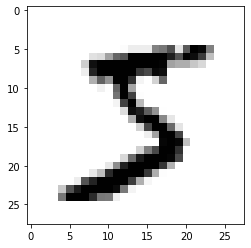

In [12]:
import matplotlib.pyplot as plt

indice = 0

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)